In [67]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Import training data set
data = np.loadtxt(open("ex2data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]

In [69]:
# Plot data
def plot_data(X, y):
    pos = data[:, 2] == 1
    neg = data[:, 2] == 0
        
    fig = plt.figure()

    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

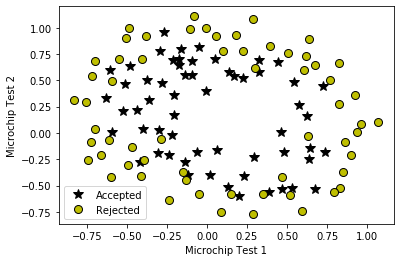

In [71]:
plotData(X, y)

# add axes labels
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['Accepted', 'Rejected'])

In [72]:
print ("X shape: " + str(X.shape))
print ("y shape: " + str(y.shape))

X shape: (118, 2)
y shape: (118,)


In [73]:
# Feature mapping to polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
poly_feat_X = poly.fit_transform(X)
poly_feat_X.shape

(118, 28)

In [74]:
# Sigmoid function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [75]:
# Cost function with regularization
def cost_function_with_regularization(theta, X, y, lambd):
    m = y.shape[0]
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(np.dot(X, theta.T))
    
    J = (1/m) * np.sum(np.dot((-y), np.log(h)) - np.dot((1-y), np.log(1-h))) + (lambd/(2*m))*np.sum(np.square(theta[1:]))
 
    return J

In [76]:
# Gradient function with regularization
def gradient_with_regularization(theta, X, y, lambd):
    m = y.shape[0]
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(np.dot(X, theta.T))
    
    grad = (1/m) * np.dot((h-y), X) + (lambd/m)*theta
 
    return grad

In [91]:
# Initialize fitting parameters
initial_theta = np.zeros(poly_feat_X.shape[1])

lambd = 1
J = cost_function_with_regularization(initial_theta, poly_feat_X, y, lambd)
grad = gradient_with_regularization(initial_theta, poly_feat_X, y, lambd)

print ("Cost at initial theta: " + str(J))
print ("Gradient at initial theta: " + str(grad))

Cost at initial theta: 0.6931471805599454
Gradient at initial theta: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [92]:
# Optimize cost function
from scipy.optimize import minimize

res = minimize(cost_function_with_regularization,
               initial_theta,
               args=(poly_feat_X,y, lambd),
               method=None,
               jac=gradient_with_regularization,
               options={'maxiter':400})

cost = res.fun
theta = res.x  # rex.x -- optimized theta values

In [93]:
# Predict function
def predict(theta, X, threshold=0.5):
    p = sigmoid(np.dot(X, theta.T)) >= threshold
    return(p.astype('int'))

In [90]:
p = predict(theta, poly_feat_X)
accuracy = 100*sum(p == y.ravel())/p.size
print('Train Accuracy: ' + str(accuracy))

Train Accuracy: 88.13559322033899


In [ ]:
# Plot decision boundary
def plotDecisionBoundary(theta,X,y):
    fig, ax = plotData(X[:,1:],y)

    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    z = np.zeros((len(u),len(v)))
    
    # Evaluate z = theta*x over values in the gridspace
    for i in range(len(u)):
        for j in range(len(v)):
            z[i][j] = np.dot(mapFeatureVector(np.array([u[i]]), np.array([v[j]])),theta)
    
    # Plot contour
    ax.contour(u,v,z,levels=[0])

    return (fig,ax)